In [1]:
import os
import pandas as pd
# Adjusting the method provided by the user to read and parse the 'ghfb190901.pos' file

file_path = os.path.join('./ghfb190901.pos')

with open(file_path, 'r') as file:
    ghfb_content = file.readlines()

# Filtering data lines
data_lines = [line for line in ghfb_content if not line.startswith('%')]

# Parsing the data
ghfb_data_split = [line.split(",") for line in data_lines[1:]]
for row in ghfb_data_split:
    last_items = row[-1].split()
    row[-1] = last_items[0]
    row.extend(last_items[1:])
ghfb_df_adjusted = pd.DataFrame(ghfb_data_split, columns=data_lines[0].split(","))
ghfb_df_adjusted['GPST'] = pd.to_datetime(ghfb_df_adjusted['   GPST                '].str.strip())
ghfb_df_adjusted['vu(m/s)'] = ghfb_df_adjusted['   vu(m/s)'].astype(float)
# ghfb_df_adjusted['GPST'] = ghfb_df_adjusted['GPST'] - pd.Timedelta(seconds=5)

# Previewing the first few rows of the parsed data
ghfb_df_adjusted.head()


,GPST,latitude(deg),longitude(deg),height(m),Q,ns,sdn(m),sde(m),sdu(m),sdne(m),...,ve(m/s),vu(m/s),sdvn,sdve,sdvu,sdvne,sdveu,sdvun\n,GPST,vu(m/s)
0,2019/03/31 01:15:23.000,36.017094262,120.527263443,2.9295,5,8,3.1347,3.0949,6.1928,-2.1644,...,0.07546,-0.00750,1.62353,1.74545,3.40229,-1.22182,1.80752,-1.79871,2019-03-31 01:15:23,-0.00750
1,2019/03/31 01:15:24.000,36.017094314,120.527266604,3.1343,5,8,3.1348,3.0952,6.1926,-2.1646,...,0.29821,0.06497,1.62340,1.74556,3.40198,-1.22183,1.80749,-1.79839,2019-03-31 01:15:24,0.06497
2,2019/03/31 01:15:25.000,36.017094623,120.527267851,2.8431,5,8,3.1348,3.0954,6.1924,-2.1648,...,0.12698,-0.21839,1.62327,1.74567,3.40167,-1.22184,1.80746,-1.79807,2019-03-31 01:15:25,-0.21839
3,2019/03/31 01:15:26.000,36.017094711,120.527271123,2.9549,5,8,3.1349,3.0957,6.1922,-2.1650,...,0.31187,0.16367,1.62314,1.74578,3.40136,-1.22185,1.80744,-1.79775,2019-03-31 01:15:26,0.16367
4,2019/03/31 01:15:27.000,36.017094027,120.527274939,3.2438,5,8,3.1350,3.0960,6.1921,-2.1652,...,0.34706,0.12198,1.62301,1.74589,3.40105,-1.22186,1.80741,-1.79743,2019-03-31 01:15:27,0.12198


In [2]:
# Extracting the 'GPST' and 'vu(m/s)' columns from the parsed dataframe

selected_data = ghfb_df_adjusted[['GPST', 'vu(m/s)']]

# Previewing the first few rows of the selected data
selected_data_preview = selected_data.head()
selected_data_preview


,GPST,vu(m/s)
0,2019-03-31 01:15:23,-0.00750
1,2019-03-31 01:15:24,0.06497
2,2019-03-31 01:15:25,-0.21839
3,2019-03-31 01:15:26,0.16367
4,2019-03-31 01:15:27,0.12198


In [3]:
# Applying the provided method to read and parse the 'ghfb19090t5.pos' file

file_path_5hz = os.path.join('./ghfb19090t5.pos')

with open(file_path_5hz, 'r') as file:
    ghfb5_content = file.readlines()

# Filtering data lines
data_lines_5hz = [line for line in ghfb5_content if not line.startswith('%')]

# Parsing the data
ghfb5_data_split = [line.split(",") for line in data_lines_5hz[1:]]
for row in ghfb5_data_split:
    last_items = row[-1].split()
    row[-1] = last_items[0]
    row.extend(last_items[1:])
ghfb5_df_adjusted = pd.DataFrame(ghfb5_data_split, columns=data_lines_5hz[0].split(","))
ghfb5_df_adjusted['GPST'] = pd.to_datetime(ghfb5_df_adjusted['   GPST                '].str.strip())
ghfb5_df_adjusted['vu(m/s)'] = ghfb5_df_adjusted['   vu(m/s)'].astype(float)
ghfb5_df_adjusted['GPST'] = ghfb5_df_adjusted['GPST']

# Extracting the 'GPST' and 'vu(m/s)' columns
selected_data_5hz = ghfb5_df_adjusted[['GPST', 'vu(m/s)']]

# Previewing the first few rows of the selected data from the second file
selected_data_5hz_preview = selected_data_5hz.head()
selected_data_5hz_preview


,GPST,vu(m/s)
0,2019-03-31 01:15:23.000,-0.08498
1,2019-03-31 01:15:23.200,-0.18488
2,2019-03-31 01:15:23.400,-0.03768
3,2019-03-31 01:15:23.600,0.21323
4,2019-03-31 01:15:23.800,0.19716


In [4]:
# Displaying the start and end timestamps from the 'GPST' column
start_time = selected_data_5hz['GPST'].iloc[0]
end_time = selected_data_5hz['GPST'].iloc[-1]

start_time, end_time

(Timestamp('2019-03-31 01:15:23'), Timestamp('2019-04-01 01:15:22.800000'))

In [5]:
# Read the "GHFBPPK.pos" file content
with open("./GHFBPPK.pos", 'r') as file:
    ghf_content = file.readlines()
# 定义 PPK 数据的列名称

# Displaying the first 50 lines of the GHFBPPK.pos file to understand its structure
ghf_content[:30]


['% program   : RTKPOST ver.2.4.3 b29\n',
 '% inp file  : H:\\厉峰师兄浮标数据\\机载高度计定标\\shiyanshuju\\浮标\\处理数据\\1号浮标（交叉点）\\2019-03-31\\GHFB0901.19O\n',
 '% inp file  : H:\\厉峰师兄浮标数据\\机载高度计定标\\shiyanshuju\\原始基站\\山科大基站\\cors站数据\\Day.31\\19033108.19o\n',
 '% inp file  : H:\\厉峰师兄浮标数据\\机载高度计定标\\shiyanshuju\\原始基站\\rinex\\brdc0900.19n\n',
 '% obs start : 2019/03/30 23:59:42.0 UTC (week2047      0.0s)\n',
 '% obs end   : 2019/03/31 23:59:41.0 UTC (week2047  86399.0s)\n',
 '% pos mode  : kinematic\n',
 '% freqs     : L1+L2+L5\n',
 '% solution  : combined\n',
 '% elev mask : 10.0 deg\n',
 '% dynamics  : off\n',
 '% tidecorr  : on\n',
 '% ionos opt : off\n',
 '% tropo opt : off\n',
 '% ephemeris : broadcast\n',
 '% navi sys  : gps glonass\n',
 '% amb res   : fix and hold\n',
 '% amb glo   : on\n',
 '% val thres : 3.0\n',
 '% antenna1  :                       ( 0.0000  0.0000  0.0000)\n',
 '% antenna2  :                       ( 0.0000  0.0000  0.0000)\n',
 '% ref pos   : 36 00 00.33324  120 07 00.12751    

In [6]:
# Function to convert degree-minute-second format to degree
def dms_to_deg(d, m, s):
    return float(d) + float(m) / 60 + float(s) / 3600
# Extracting the header from the 24th line
ghf_columns_new = ghf_content[24].strip().split()

# Extracting the actual data from the 25th line onwards
ghf_data_content = ghf_content[25:]

# Splitting each line based on whitespace to form data rows
ghf_data_split_new = [line.split() for line in ghf_data_content]
# Manually defining columns based on the structure of the data
# Extracting and converting latitude and longitude
latitudes = [dms_to_deg(row[2], row[3], row[4].split('.')[0]) + float("0." + row[4].split('.')[1]) / 3600 for row in ghf_data_split_new]
longitudes = [dms_to_deg(row[5], row[6], row[7].split('.')[0]) + float("0." + row[7].split('.')[1]) / 3600 for row in ghf_data_split_new]

# Creating the DataFrame with the corrected format
ghf_df_corrected = pd.DataFrame({
    'UTC': [row[0] + " " + row[1] for row in ghf_data_split_new],
    'latitude(deg)': latitudes,
    'longitude(deg)': longitudes,
    'height(m)': [float(row[8]) for row in ghf_data_split_new],
    'Q': [int(row[9]) for row in ghf_data_split_new],
    'ns': [int(row[10]) for row in ghf_data_split_new],
    'sdn(m)': [float(row[11]) for row in ghf_data_split_new],
    'sde(m)': [float(row[12]) for row in ghf_data_split_new],
    'sdu(m)': [float(row[13]) for row in ghf_data_split_new],
    'sdne(m)': [float(row[14]) for row in ghf_data_split_new],
    'sdeu(m)': [float(row[15]) for row in ghf_data_split_new],
    'sdun(m)': [float(row[16]) for row in ghf_data_split_new],
    'age(s)': [float(row[17]) for row in ghf_data_split_new],
    'ratio': [float(row[18]) for row in ghf_data_split_new]
})

# Convert UTC to datetime format
ghf_df_corrected['UTC'] = pd.to_datetime(ghf_df_corrected['UTC'])

ghf_df_corrected.head()



,UTC,latitude(deg),longitude(deg),height(m),Q,ns,sdn(m),sde(m),sdu(m),sdne(m),sdeu(m),sdun(m),age(s),ratio
0,2019-03-30 23:59:42,35.993711,120.414036,6.0822,1,8,0.0030,0.0030,0.0093,0.0007,-0.0011,0.0025,0.0,5.1
1,2019-03-30 23:59:43,35.993696,120.414077,6.0477,1,8,0.0064,0.0053,0.0169,-0.0011,0.0020,0.0051,-9.0,4.9
2,2019-03-30 23:59:44,35.993680,120.414118,6.0861,1,8,0.0058,0.0049,0.0157,-0.0009,0.0016,0.0046,-8.0,5.2
3,2019-03-30 23:59:45,35.993664,120.414159,6.1266,1,8,0.0053,0.0045,0.0145,-0.0005,0.0010,0.0042,-7.0,5.7
4,2019-03-30 23:59:46,35.993650,120.414202,6.1218,1,8,0.0049,0.0042,0.0134,0.0005,-0.0003,0.0038,-6.0,5.6


In [7]:
# Extracting only the UTC and sdu(m) columns for SSH data
ghf_ssh_df = ghf_df_corrected[['UTC', 'height(m)']]
ghf_ssh_df.columns = ['UTC', 'SSH']

ghf_ssh_df.head()


,UTC,SSH
0,2019-03-30 23:59:42,6.0822
1,2019-03-30 23:59:43,6.0477
2,2019-03-30 23:59:44,6.0861
3,2019-03-30 23:59:45,6.1266
4,2019-03-30 23:59:46,6.1218


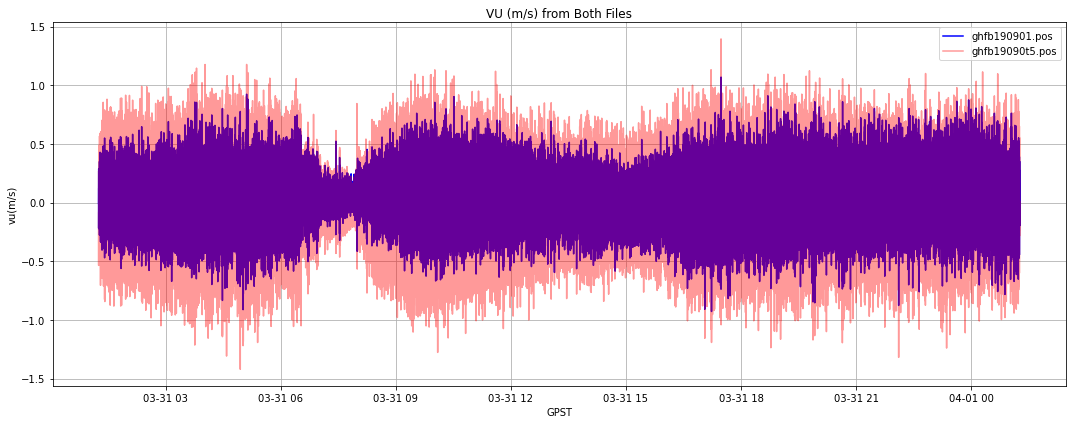

In [8]:
import matplotlib.pyplot as plt

# Plotting the 'vu(m/s)' data from both files

plt.figure(figsize=(15, 6))

# Plotting for 'ghfb190901.pos'
plt.plot(selected_data['GPST'], selected_data['vu(m/s)'], label='ghfb190901.pos', color='blue')

# Plotting for 'ghfb19090t5.pos'
plt.plot(selected_data_5hz['GPST'], selected_data_5hz['vu(m/s)'], label='ghfb19090t5.pos', color='red', alpha=0.4)

plt.title('VU (m/s) from Both Files')
plt.xlabel('GPST')
plt.ylabel('vu(m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
selected_data_1hz=selected_data

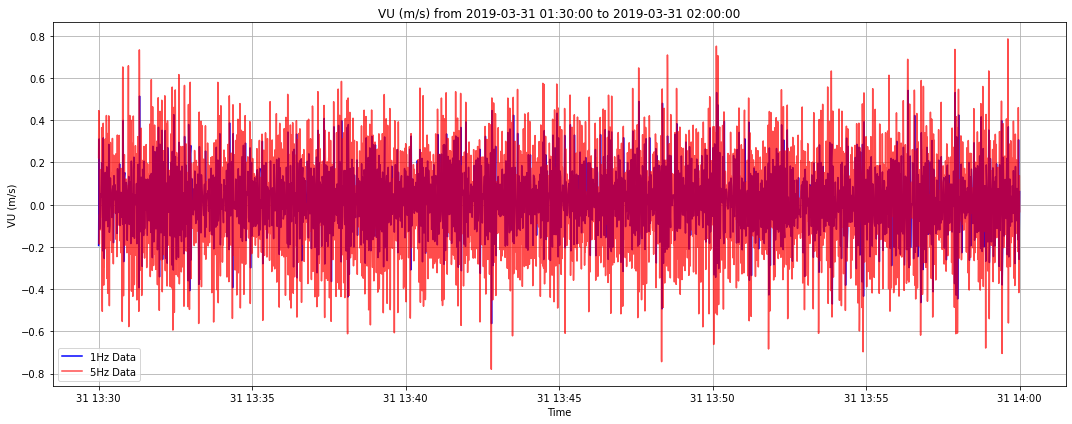

In [10]:
# Filtering the data for the specified time range: "2019-03-31 01:30:00" to "2019-03-31 02:00:00"
start_time_filter = pd.Timestamp("2019-03-31 13:30:00")
end_time_filter = pd.Timestamp("2019-03-31 14:00:00")

filtered_data_1hz = selected_data_1hz[(selected_data_1hz['GPST'] >= start_time_filter) & (selected_data_1hz['GPST'] <= end_time_filter)]
filtered_data_5hz = selected_data_5hz[(selected_data_5hz['GPST'] >= start_time_filter) & (selected_data_5hz['GPST'] <= end_time_filter)]

# Filtering the SSH data for the specified time range
filtered_ghf_ssh = ghf_ssh_df[(ghf_ssh_df['UTC'] >= start_time_filter) & (ghf_ssh_df['UTC'] <= end_time_filter)]

# Plotting the 'vu(m/s)' data for the specified time range
plt.figure(figsize=(15, 6))
plt.plot(filtered_data_1hz['GPST'], filtered_data_1hz['vu(m/s)'], label='1Hz Data', color='blue')
plt.plot(filtered_data_5hz['GPST'], filtered_data_5hz['vu(m/s)'], label='5Hz Data', color='red', alpha=0.7)
plt.title('VU (m/s) from 2019-03-31 01:30:00 to 2019-03-31 02:00:00')
plt.xlabel('Time')
plt.ylabel('VU (m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# 速度积分得到SSH# Calculating SSH from the velocity data

# For 1Hz data
filtered_data_1hz['SSH'] = filtered_data_1hz['vu(m/s)'].cumsum() * (filtered_data_1hz['GPST'].diff().dt.total_seconds().fillna(0))
filtered_data_1hz['SSH'] = filtered_data_1hz['SSH'] - filtered_data_1hz['SSH'].iloc[0]  # Resetting the initial value to 0

# For 5Hz data
filtered_data_5hz['SSH'] = filtered_data_5hz['vu(m/s)'].cumsum() * (filtered_data_5hz['GPST'].diff().dt.total_seconds().fillna(0))
filtered_data_5hz['SSH'] = filtered_data_5hz['SSH'] - filtered_data_5hz['SSH'].iloc[0]  # Resetting the initial value to 0

# Returning the first few rows of the SSH data for both datasets
filtered_data_1hz_head, filtered_data_5hz_head = filtered_data_1hz.head(), filtered_data_5hz.head()
filtered_data_1hz_head, filtered_data_5hz_head


C:\Users\yangleir\AppData\Local\Temp/ipykernel_240/3743875163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1hz['SSH'] = filtered_data_1hz['vu(m/s)'].cumsum() * (filtered_data_1hz['GPST'].diff().dt.total_seconds().fillna(0))
C:\Users\yangleir\AppData\Local\Temp/ipykernel_240/3743875163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1hz['SSH'] = filtered_data_1hz['SSH'] - filtered_data_1hz['SSH'].iloc[0]  # Resetting the initial value to 0
C:\Users\yangleir\AppData\Loca

(                     GPST  vu(m/s)      SSH
 44077 2019-03-31 13:30:00 -0.19299  0.00000
 44078 2019-03-31 13:30:01  0.31162  0.11863
 44079 2019-03-31 13:30:02 -0.11597  0.00266
 44080 2019-03-31 13:30:03 -0.08705 -0.08439
 44081 2019-03-31 13:30:04  0.05046 -0.03393,
                           GPST  vu(m/s)       SSH
 220385 2019-03-31 13:30:00.000  0.22317  0.000000
 220386 2019-03-31 13:30:00.200  0.39689  0.124012
 220387 2019-03-31 13:30:00.400  0.44561  0.213134
 220388 2019-03-31 13:30:00.600  0.31284  0.275702
 220389 2019-03-31 13:30:00.800  0.13546  0.302794)

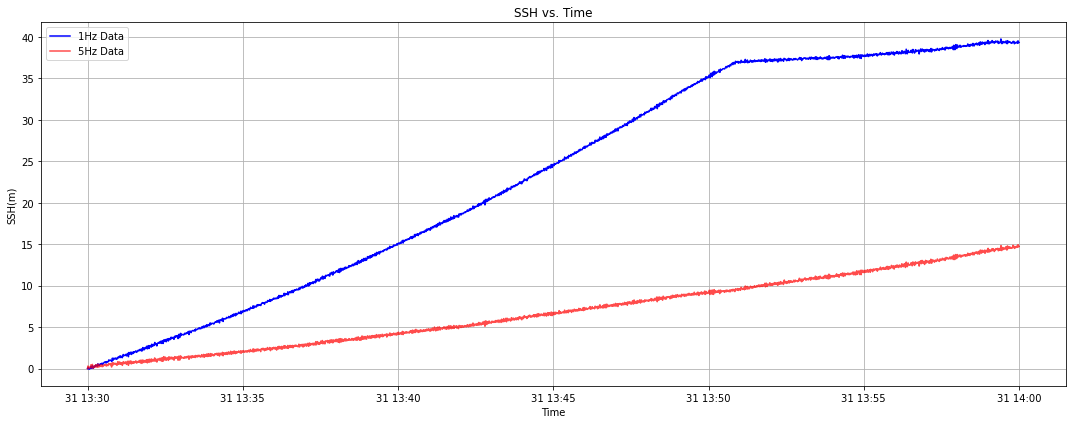

In [13]:
import matplotlib.pyplot as plt

# Plotting the SSH data for both datasets
plt.figure(figsize=(15, 6))
plt.plot(filtered_data_1hz['GPST'], filtered_data_1hz['SSH'], label='1Hz Data', color='blue')
plt.plot(filtered_data_5hz['GPST'], filtered_data_5hz['SSH'], label='5Hz Data', color='red', alpha=0.7)
plt.title('SSH vs. Time')
plt.xlabel('Time')
plt.ylabel('SSH(m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


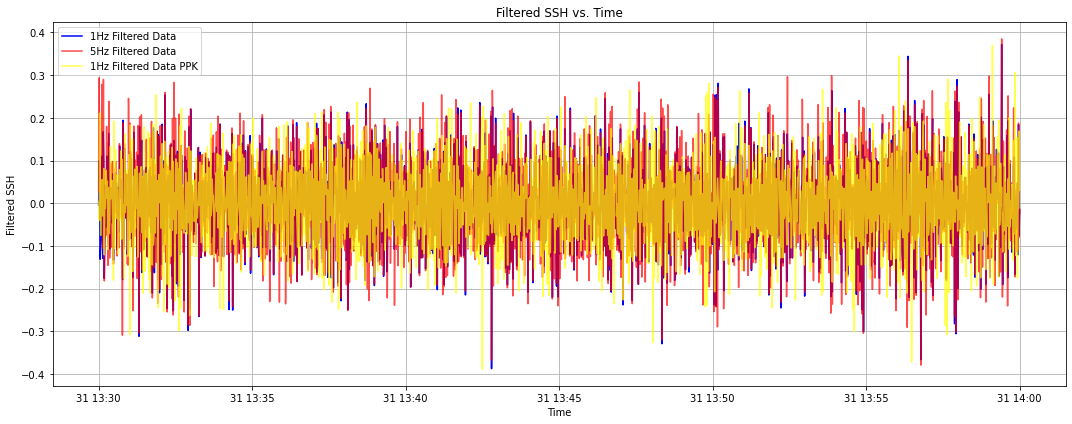

In [30]:
# 高通滤波得到SSE
import numpy as np
from scipy.signal import butter, filtfilt

# Define the high-pass filter
def highpass_filter(data, cutoff_frequency, sampling_frequency):
    nyquist = 0.5 * sampling_frequency
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(1, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# Define the sampling frequency based on the data rate
sampling_frequency_1hz = 1.0  # For 1Hz data
sampling_frequency_5hz = 5.0  # For 5Hz data

# Filter the SSH data
filtered_SSH_1hz = highpass_filter(filtered_data_1hz['SSH'], 1/30, sampling_frequency_1hz)
filtered_SSH_5hz = highpass_filter(filtered_data_5hz['SSH'], 1/30, sampling_frequency_5hz)
filtered_SSH_1hz_ppk = highpass_filter(filtered_ghf_ssh['SSH'], 1/30, sampling_frequency_1hz)

# Plotting the filtered SSH data
plt.figure(figsize=(15, 6))
plt.plot(filtered_data_1hz['GPST'], filtered_SSH_1hz, label='1Hz Filtered Data', color='blue')
plt.plot(filtered_data_5hz['GPST'], filtered_SSH_5hz, label='5Hz Filtered Data', color='red', alpha=0.7)
plt.plot(filtered_ghf_ssh['UTC'], filtered_SSH_1hz_ppk, label='1Hz Filtered Data PPK', color='yellow', alpha=0.7)
plt.title('Filtered SSH vs. Time')
plt.xlabel('Time')
plt.ylabel('Filtered SSH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


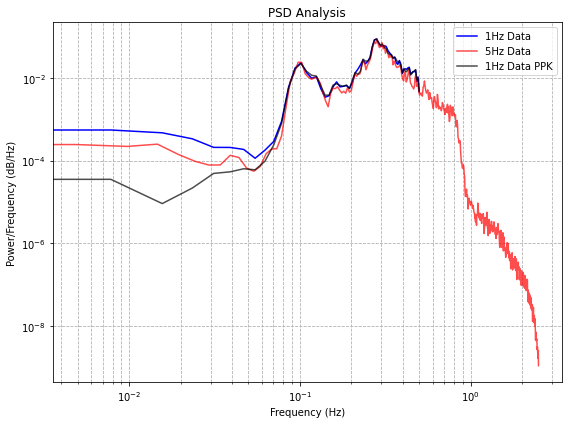

In [31]:
# SSE做FFT，得到PSD。比较1Hz和5Hz的PSD差异
from scipy.signal import welch

# Compute the PSD using Welch's method
frequencies_1hz, PSD_1hz = welch(filtered_SSH_1hz, fs=sampling_frequency_1hz, nperseg=128)

frequencies_5hz, PSD_5hz = welch(filtered_SSH_5hz, fs=sampling_frequency_5hz, nperseg=1024)

frequencies_1hz_ppk, PSD_1hz_ppk = welch(filtered_SSH_1hz_ppk, fs=sampling_frequency_1hz, nperseg=128)

# Plotting the PSD for both datasets

plt.figure(figsize=(8, 6))
plt.loglog(frequencies_1hz, PSD_1hz, label='1Hz Data', color='blue')
plt.loglog(frequencies_5hz, PSD_5hz, label='5Hz Data', color='red', alpha=0.7)
plt.loglog(frequencies_1hz_ppk, PSD_1hz_ppk, label='1Hz Data PPK', color='black', alpha=0.7)
plt.title('PSD Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


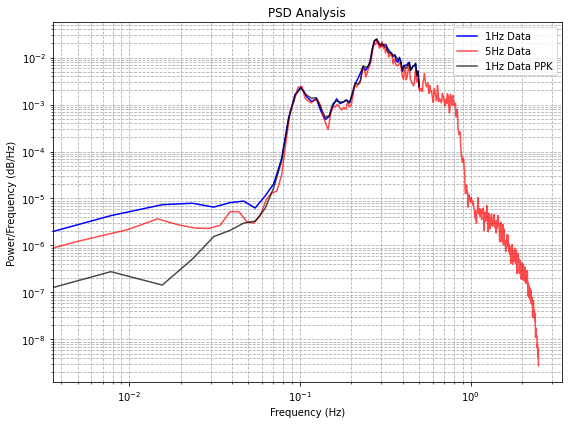

In [32]:
# 一阶矩，也叫做variance preserving spectrum
plt.figure(figsize=(8, 6))
plt.loglog(frequencies_1hz, PSD_1hz*frequencies_1hz, label='1Hz Data', color='blue')
plt.loglog(frequencies_5hz, PSD_5hz*frequencies_5hz, label='5Hz Data', color='red', alpha=0.7)
plt.loglog(frequencies_1hz_ppk, PSD_1hz_ppk*frequencies_1hz_ppk, label='1Hz Data PPK', color='black', alpha=0.7)
plt.title('PSD Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

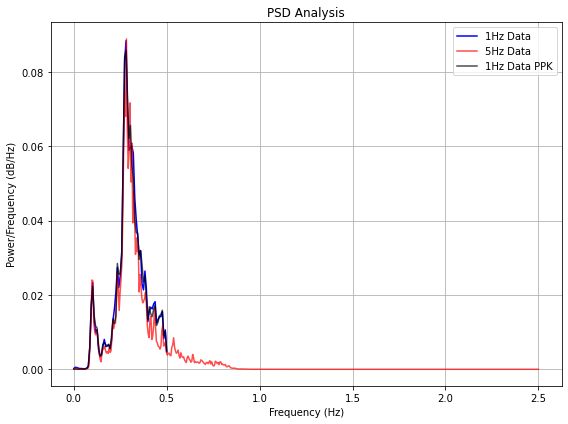

In [33]:
# Plotting the PSD for both datasets using regular axes
plt.figure(figsize=(8, 6))
plt.plot(frequencies_1hz, PSD_1hz, label='1Hz Data', color='blue')
plt.plot(frequencies_5hz, PSD_5hz, label='5Hz Data', color='red', alpha=0.7)
plt.plot(frequencies_1hz_ppk, PSD_1hz_ppk, label='1Hz Data PPK', color='black', alpha=0.7)
plt.title('PSD Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Compute frequency differences for 1Hz data
delta_frequencies_1hz = np.diff(frequencies_1hz)
# Appending the last value to make it the same length as the original frequencies array
delta_frequencies_1hz = np.append(delta_frequencies_1hz, delta_frequencies_1hz[-1])

# Compute frequency differences for 5Hz data
delta_frequencies_5hz = np.diff(frequencies_5hz)
# Appending the last value to make it the same length as the original frequencies array
delta_frequencies_5hz = np.append(delta_frequencies_5hz, delta_frequencies_5hz[-1])

# Compute the energy (zeroth moment of the PSD) for both datasets
energy_1hz = np.sum(PSD_1hz * delta_frequencies_1hz)
energy_5hz = np.sum(PSD_5hz * delta_frequencies_5hz)

# Compute the energy (zeroth moment of the PSD) for both datasets
energy_1hz_1 = np.sum(PSD_1hz * frequencies_1hz * delta_frequencies_1hz)
energy_5hz_1 = np.sum(PSD_5hz * frequencies_5hz * delta_frequencies_5hz)


energy_1hz, energy_5hz


(0.010173468967715706, 0.009413645561256897)

In [35]:
import numpy as np

rms_1hz = np.sqrt(energy_1hz)
rms_5hz = np.sqrt(energy_5hz)

rms_1hz*4, rms_5hz*4


(0.40345446271351526, 0.3880957729480062)

In [36]:
import numpy as np

# Calculate the standard deviation for filtered_SSH_1hz and filtered_SSH_5hz
std_1hz = np.std(filtered_SSH_1hz)
std_5hz = np.std(filtered_SSH_5hz)

std_1hz, std_5hz


(0.10025612250991385, 0.0984435815475265)

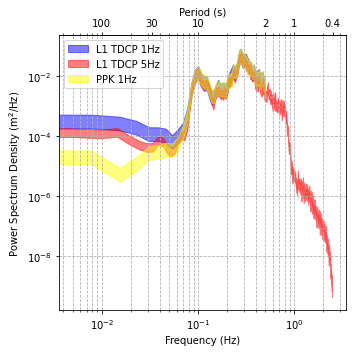

In [41]:
from scipy.stats import chi2

# Define a function to compute the 95% confidence interval
def confidence_interval(PSD, D, alpha=0.05):
    chi2_low = chi2.ppf(alpha / 2, 2 * D)
    chi2_high = chi2.ppf(1 - alpha / 2, 2 * D)
    lower = (D * PSD) / chi2_high
    upper = (D * PSD) / chi2_low
    return lower, upper

# Compute the number of independent segments
D_1hz = len(filtered_SSH_1hz) / 128
D_5hz = len(filtered_SSH_5hz) / 256
D_1hz_ppk = len(filtered_SSH_1hz_ppk) / 128

# Compute the confidence intervals
lower_1hz, upper_1hz = confidence_interval(PSD_1hz, D_1hz)
lower_5hz, upper_5hz = confidence_interval(PSD_5hz, D_5hz)
lower_1hz_ppk, upper_1hz_ppk = confidence_interval(PSD_1hz_ppk, D_1hz_ppk)

# Plotting the PSD with the 95% confidence intervals
plt.figure(figsize=(5, 5))
plt.loglog(frequencies_1hz, PSD_1hz, color='blue',alpha=0.0)
plt.fill_between(frequencies_1hz, lower_1hz, upper_1hz, color='blue', label='L1 TDCP 1Hz', alpha=0.5)
plt.loglog(frequencies_5hz, PSD_5hz,  color='red', alpha=0.0)
plt.loglog(frequencies_1hz_ppk, PSD_1hz_ppk,  color='red', alpha=0.0)

# 创建一个次要的 X 轴在上方
secax = plt.gca().secondary_xaxis('top')

# 定义时间刻度及其对应的频率
time_ticks = [0.4,1,2, 10,30, 100]  # 时间刻度（秒）
freq_ticks = [1/f for f in time_ticks]  # 对应的频率（Hz）

# 设置次要 X 轴的刻度和标签
secax.set_xlabel('Period (s)')
secax.set_xscale('log')  # 如果主 X 轴是对数刻度，则此处也应使用对数刻度
secax.set_xticks(freq_ticks)  # 设置特定的频率刻度
secax.set_xticklabels(time_ticks)  # 设置时间刻度标签


plt.fill_between(frequencies_5hz, lower_5hz, upper_5hz, color='red', label='L1 TDCP 5Hz', alpha=0.5)
plt.fill_between(frequencies_1hz_ppk, lower_1hz_ppk, upper_1hz_ppk, color='yellow',label='PPK 1Hz', alpha=0.5)
# plt.title('PSD Analysis with 95% Confidence Intervals')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power Spectrum Density (m$^2$/Hz)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig("./5hz.pdf")
plt.show()


In [42]:
T_1hz = energy_1hz / energy_1hz_1
T_5hz = energy_5hz / energy_5hz_1
T_1hz, T_5hz

(3.300518373988797, 3.051960992876672)